# E19: Pix2pix를 이용해서 Segmentation map으로 도로 이미지 만들기
### 목표:픽셀 별로 레이블 정보만 존재하는 segmentation map을 입력으로 실제 거리 사진을 생성해 낸다.

#### 루브릭
1. pix2pix 모델 학습을 위해 필요한 데이터셋을 적절히 구축하였다.   
데이터 분석 과정 및 한 가지 이상의 augmentation을 포함한 데이터셋 구축 과정이 체계적으로 제시되었다.
2. pix2pix 모델을 구현하여 성공적으로 학습 과정을 진행하였다.   
U-Net generator, discriminator 모델 구현이 완료되어 train_step이 안정적으로 진행됨을 확인하였다.
3. 학습 과정 및 테스트에 대한 시각화 결과를 제출하였다.   
10 epoch 이상의 학습을 진행한 후 최종 테스트 결과에서 진행한 epoch 수에 걸맞은 정도의 품질을 확인하였다.

#### 프로젝트 수행
1. 데이터에 한 가지 이상의 augmentation 방법을 적용하여 학습해주세요.
(어떠한 방법을 사용했는지 적어주세요.)

2. 이전에 구현했던 두 개의 Generator 중 Encoder와 Decoder간에 skip connection이 있는 U-Net Generator를 사용해주세요.
3. 모델 학습 후, 학습된 Generator를 이용해 테스트합니다. 테스트 데이터는 다운받았던 "val" 폴더 내 이미지를 사용해주세요.
4. 1개 이상의 이미지에 대해 테스트 과정을 거친 후 그 결과를 스케치, 생성된 사진, 실제 사진 순서로 나란히 시각화해 주세요.
5. 모델을 충분히 학습하기에 시간이 부족할 수 있습니다. 적어도 10 epoch 이상 학습하며 중간 손실 값에 대한 로그를 남겨주세요. 좋은 결과를 얻기 위해선 긴 학습 시간이 필요하므로 테스트 결과는 만족스럽지 않아도 괜찮습니다.

#### cgan이란?
- 잘 학습된 GAN을 이용해 실제 이미지를 생성할 때 원하는 종류의 이미지를 바로 생성해 내지 못한다.
- 다시 말해서 일반적인 GAN과 같은 unconditioned generative model은 내가 생성하고자 하는 데이터에 대해 제어하기 힘들었다.
- 따라서, unconditioned 모델을 condition해서 특정 조건을 준다.
- 특정 조건을 목적함수에서 확인할 수 있다. D(x)와 G(z)가 각각 D(x∣y), G(z∣y)로 바뀌었는데 y가 바로 특정 조건에 해당된다.   
(여기서 x는 실제 데이터, z는 노이즈)
- 여기서 y는 레이블 정보이며, 일반적으로 one-hot 벡터를 입력으로 넣는다.   
#### pix2pix란?
- 기존 노이즈 입력을 이미지로 변환하는 일반적인 GAN이 아니라, 이미지를 입력으로 하여 원하는 다른 형태의 이미지로 변환시킬 수 있는 GAN 모델
- Conditional Adversarial Networks로 Image-to-Image Translation을 수행한다.
- 즉, 이미지에 간 변환이 이루어진다는 것이다.   
#### pix2pix의 U-Net generator 구조란?
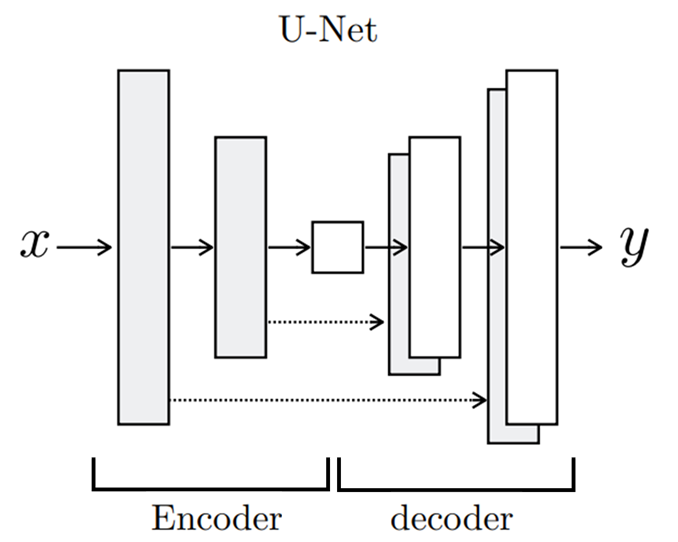
- 기존 generator 구조와의 차이점: 이어마다 Encoder와 Decoder가 연결(skip connection)되어 있다는 것
- skip connection 이용하는 이유? Decoder가 변환된 이미지를 더 잘 생성하도록 Encoder로부터 더 많은 추가 정보를 이용하는 방법이기 때문이다.   
#### pix2pix의 loss function?
- 출력된 이미지와 실제 이미지의 차이로 L2(MSE), L1(MAE) 같은 손실을 계산한 후 이를 역전파하여 네트워크를 Generator가 학습시킨다면?   
 Generator는 단순히 이미지의 평균적인 손실만을 줄이고자 파라미터를 학습하기 때문에 이미지가 흐릿해진다.
- cGAN과 같은 GAN 기반의 학습 방법만 사용한다면?   
비교적 선명하고 세밀한 정보를 표현할 수 있다. iscriminator를 잘 속이려면 Generator가 (Ground truth라고 쓰여진 이미지같이) 진짜 같은 이미지를 만들어야 하기 때문이다. 그러나, 세밀한 그 정보가 원본과 동떨어진 결과 값일 수가 있다. 제한된 정보로 세밀하게 표현하려고 하기 때문이다.
- 따라서, Ground Truth와 근접한 정보(세밀한 동시에 정확한 정보)를 표현하기 위해 L1손실과 GAN 손실을 함께 사용하자!   
#### pix2pix의 discriminator? patchGAN
- 기존 DCGAN의 Discriminator: 생성된 가짜이미지 혹은 진짜이미지를 하나씩 입력받아 convolution 레이어를 이용해 점점 크기를 줄여나가면서, 최종적으로 하나의 이미지에 대해 하나의 확률값을 출력
- pix2pix의 Discriminator: 하나의 전체 이미지에 대해 하나의 확률값이 아닌 여러개의 확률 값을 도출하자는 아이디어
- 일반적으로 이미지에서 거리가 먼 두 픽셀은 서로 연관성이 거의 없기 때문에 특정 크기를 가진 일부 영역에 대해서 세부적으로 진짜/가짜를 판별하는 것이 Generator로 하여금 더 진짜 같은 이미지를 만들도록 하는 방법
- patch 크기 정하는 tip:   
전체 pixel 수를 n * n이라고 가정할 때, patch 크기를 n * n으로 설정하면, 전체 이미지에 대해 하나의 확률값을 구하는 것이므로 patchGAN을 사용하는 의미가 사라진다.    
반면, patch 크기를 너무 작게 잡아주면 너무 작은 receptive field를 가지고 확률값을 구하기 때문에 출력 이미지가 선명하지 않다.    
따라서, patch의 크기를 너무 작지도, 크지도 않게 설정해주도록 한다.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation
from tensorflow import data
from tensorflow.keras import layers, Input, Model

In [2]:
data_path = os.getenv('HOME')+'/aiffel/conditional_generation/data/cityscapes/'
train_data_path = data_path+'train/'
val_data_path = data_path+'val/'

print("number of train examples :", len(os.listdir(train_data_path)))
print("number of validation examples :", len(os.listdir(val_data_path)))

number of train examples : 1000
number of validation examples : 5


#### 이미지 시각화

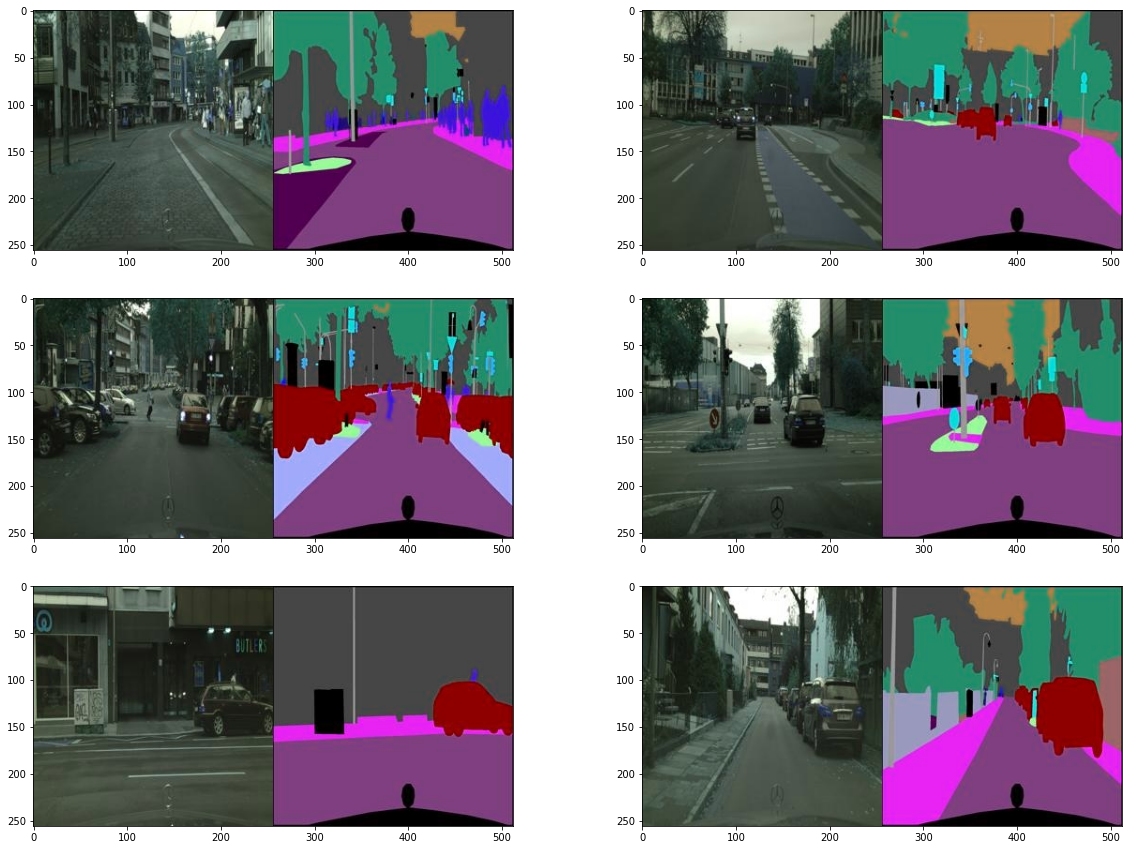

In [3]:
plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = train_data_path + os.listdir(train_data_path)[np.random.randint(1000)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

#### 이미지 분리

In [4]:
f = train_data_path + os.listdir(train_data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)

(256, 512, 3)


- (256, 512, 3) 크기의 이미지를 (256, 256, 3) 크기의 두 개의 이미지로 나눠보자
 - 첫 번째 스케치를 다음 단계에서 구성할 Pix2Pix 모델에 입력한다.
 - 두 번째 그림과 같은 채색된 이미지를 생성하는 것이 목표다.

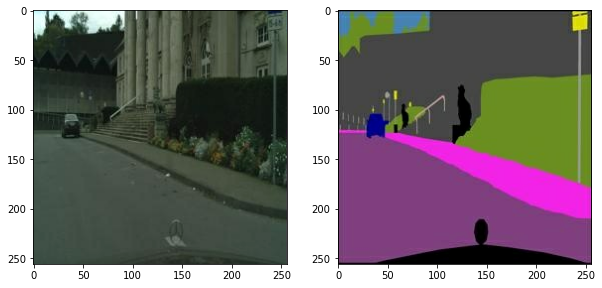

In [5]:
# 이미지 픽셀 값을 -1~1로 정규화
def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)

f = train_data_path + os.listdir(train_data_path)[1]
sketch, colored = load_img(f)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

## Augmentation

In [6]:
@tf.function() # 빠른 텐서플로 연산을 위해 @tf.function()을 사용합니다. 
def apply_augmentation(sketch, colored):
    stacked = tf.concat([sketch, colored], axis=-1)
    
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    out = image.random_crop(padded, size=[256, 256, 6])
    
    out = image.random_flip_left_right(out)
    out = image.random_flip_up_down(out)
    
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]

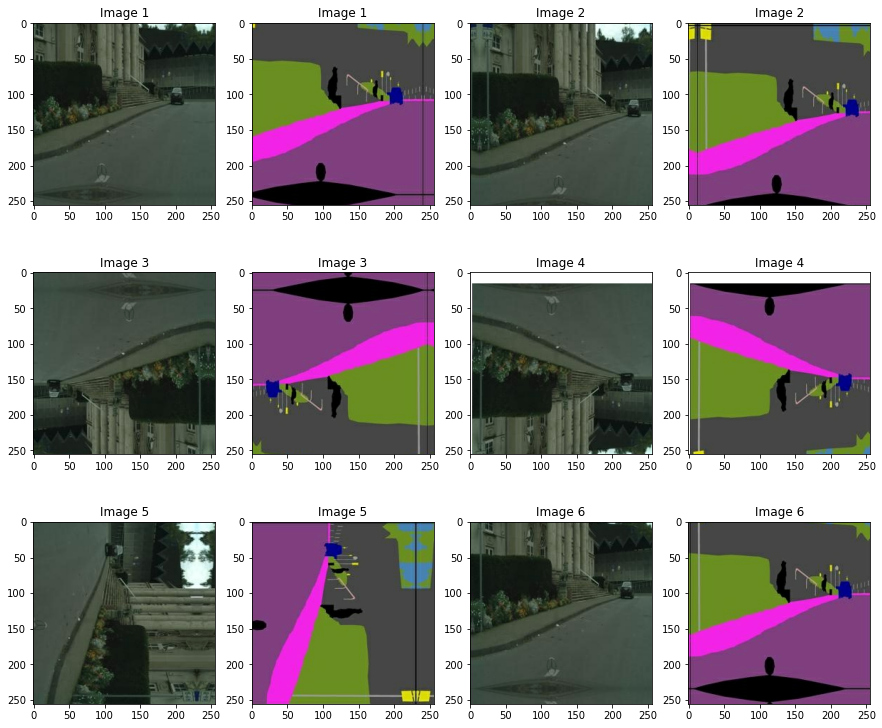

In [7]:
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_sketch, augmented_colored = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

- 대부분의 경우 train dataset의 수가 클수록 모델의 학습 후 성능이 개선된다. 
- 이 경우 train dataset의 수가 1000개에 불과하므로 데이터셋이 다소 부족한 감이 있다.
- train dataset의 수를 늘려주는게 이상적이겠지만 dataset을 확보하는 데에 많은 비용과 시간이 들어간다.
- 이때 가장 현실적인 방법이 augmentation을 통해 가지고 있는 dataset에 변형을 주어 dataset의 크기를 늘리는 것이다.
- 이번에 선택한 augmentation 방법은 이미지 일부를 자르고, 90도를 기준으로 회전을 여러번하는 것을 혼합하는 방식이다.
- crop: image 1,4,5의 흰 공백을 통해 이미지가 잘렸음을 확인할 수 있다.
- rotation:
 - image1: 양의 방향으로 90도
 - image3: 음의 방향으로 90도
 - image5: 양의 방향으로 90도
 - image6: 양/음의 방향으로 180도
- 이번 익스플로레이션에서는 crop과 rotation을 통한 positional augmentation을 도입했지만, 더 나아가 밝기, 대비 등을 이용한 color augmentation을 수행해볼 수도 있다.

#### augmentation이 잘 되었는지 train 데이터셋 중 임의로 하나를 뽑아 확인

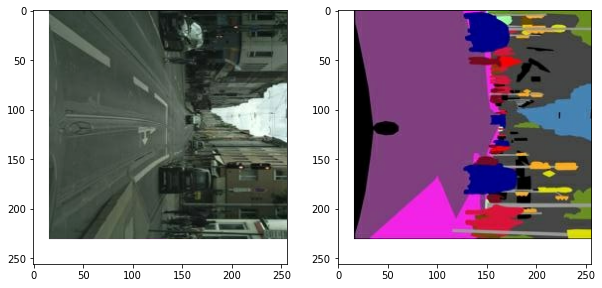

In [8]:
def get_train(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(train_data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

## Pix2pix
#### 기본 Encoder, Decoder 블록

In [9]:
class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        # n_filters = 사용할 필터의 개수, BatchNorm 사용 여부
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn       
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2)

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)
    
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False)
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x)
        return self.relu(x)

#### UNetGenerator

In [10]:
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        encode_filters = [64,128,256,512,512,512,512,512]
        decode_filters = [512,512,512,512,256,128,64]
        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            if i == 0:
                self.encode_blocks.append(EncodeBlock(f, use_bn=False))
            else:
                self.encode_blocks.append(EncodeBlock(f))
        
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            if i < 3:
                self.decode_blocks.append(DecodeBlock(f))
            else:
                self.decode_blocks.append(DecodeBlock(f, dropout=False))
        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            features.append(x)
        
        features = features[:-1]
        # Skip connection을 위해 만들어진 features 리스트에는 Encoder 내 각 블록의 출력이 들어있는데, 
        # Encoder의 마지막 출력(feature리스트 의 마지막 항목)은 Decoder로 직접 입력되므로 skip connection의 대상이 아닙니다.
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
        # Skip connection은 Encoder 내 첫 번째 블록의 출력이 Decoder의 마지막 블록에 연결되고, 
        # Encoder 내 두 번째 블록의 출력이 Decoder의 뒤에서 2번째 블록에 연결되는.. 등 대칭을 이룹니다. 
        # features에는 Encoder 블록들의 출력들이 순서대로 쌓여있고, 
        # 이를 Decoder에서 차례대로 사용하기 위해서 features의 역순으로 연결합니다.
            x = block(x)
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()

- U-Net Generator에서 skip connection이 call() 내부에서 어떻게 구현되었는지 잘 확인해보자.

In [11]:
UNetGenerator().get_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encode_block (EncodeBlock)      (None, 128, 128, 64) 3072        input_1[0][0]                    
__________________________________________________________________________________________________
encode_block_1 (EncodeBlock)    (None, 64, 64, 128)  131584      encode_block[0][0]               
__________________________________________________________________________________________________
encode_block_2 (EncodeBlock)    (None, 32, 32, 256)  525312      encode_block_1[0][0]             
______________________________________________________________________________________________

## Discriminator
#### Discriminator 기본 블럭

In [12]:
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 

- Discriminator 기본 블럭을 이용해서 Discriminator

In [13]:
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.block1 = layers.Concatenate()
        self.block2 = DiscBlock(n_filters=64, stride=2, custom_pad=False, use_bn=False, act=True)
        self.block3 = DiscBlock(n_filters=128, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block4 = DiscBlock(n_filters=256, stride=2, custom_pad=False, use_bn=True, act=True)
        self.block5 = DiscBlock(n_filters=512, stride=1, custom_pad=True, use_bn=True, act=True)
        self.block6 = DiscBlock(n_filters=1, stride=1, custom_pad=True, use_bn=False, act=False)
        self.sigmoid = layers.Activation("sigmoid")
        
        # filters = [64,128,256,512,1]
        # self.blocks = [layers.Concatenate()]
        # for i, f in enumerate(filters):
        #     self.blocks.append(DiscBlock(
        #         n_filters=f,
        #         strides=2 if i<3 else 1,
        #         custom_pad=False if i<3 else True,
        #         use_bn=False if i==0 and i==4 else True,
        #         act=True if i<4 else False
        #     ))
    
    def call(self, x, y):
        out = self.block1([x, y])
        out = self.block2(out)
        out = self.block3(out)
        out = self.block4(out)
        out = self.block5(out)
        out = self.block6(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()

## 모델 학습
- 일반적인 GAN의 손실함수에 L1을 추가로 이용해서 가장 실제에 가까운 이미지를 생성하자   

#### 손실 함수

In [14]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

#### optimizer

In [15]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

#### 하나의 배치 크기만큼 데이터를 입력했을 때 가중치를 1회 업데이트하는 과정

In [16]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator 예측
        fake_colored = generator(sketch, training=True)
        # Discriminator 예측
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)
        # Generator 손실 계산
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss) ## <===== L1 손실 반영 λ=100
        # Discrminator 손실 계산
        disc_loss = get_disc_loss(fake_disc, real_disc)
                
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

In [17]:
EPOCHS = 32 

generator = UNetGenerator()
discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):
    for i, (sketch, colored) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(sketch, colored)
                
        # 200회 반복마다 손실을 출력합니다.
        if (i+1) % 200 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[200]                     
Generator_loss:2.9216                     
L1_loss:0.2336                     
Discriminator_loss:0.5012

EPOCH[2] - STEP[200]                     
Generator_loss:1.3452                     
L1_loss:0.1907                     
Discriminator_loss:0.6778

EPOCH[3] - STEP[200]                     
Generator_loss:3.0391                     
L1_loss:0.2235                     
Discriminator_loss:0.6877

EPOCH[4] - STEP[200]                     
Generator_loss:1.3198                     
L1_loss:0.2035                     
Discriminator_loss:0.6999

EPOCH[5] - STEP[200]                     
Generator_loss:1.6756                     
L1_loss:0.2231                     
Discriminator_loss:0.4303

EPOCH[6] - STEP[200]                     
Generator_loss:1.9675                     
L1_loss:0.1601                     
Discriminator_loss:0.4627

EPOCH[7] - STEP[200]                     
Generator_loss:3.6021                     
L1_loss:0.1783             

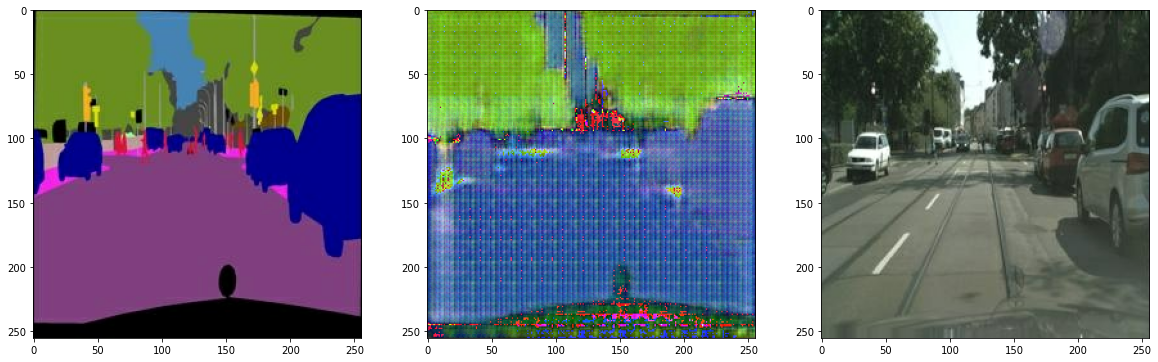

In [22]:
test_ind = 1

f = val_data_path + os.listdir(val_data_path)[test_ind]
colored, sketch = load_img(f)

pred = generator(tf.expand_dims(sketch, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(sketch))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(colored))

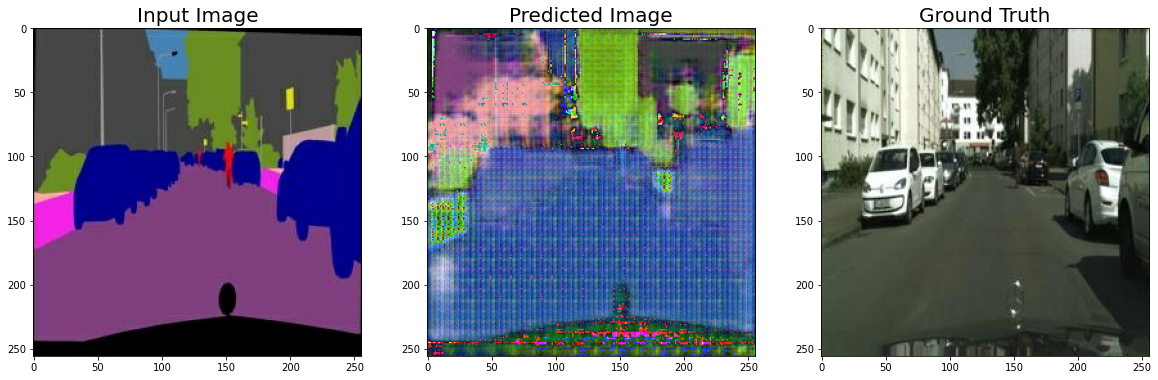

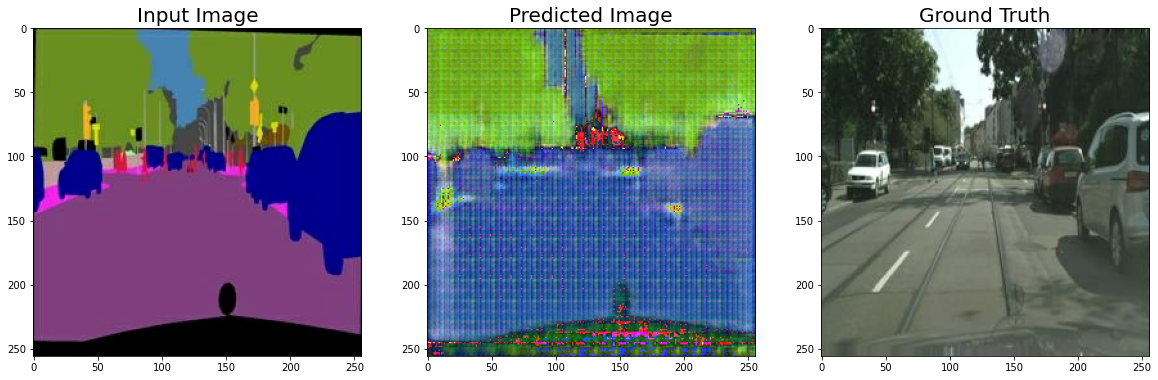

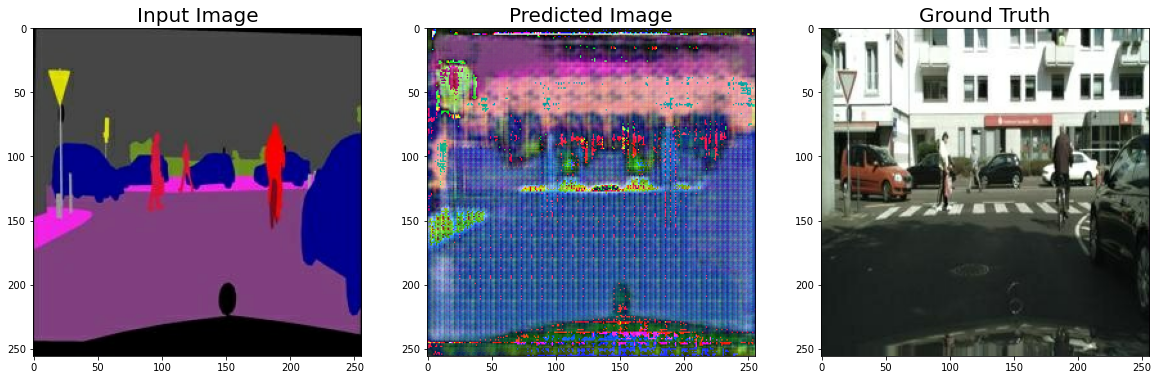

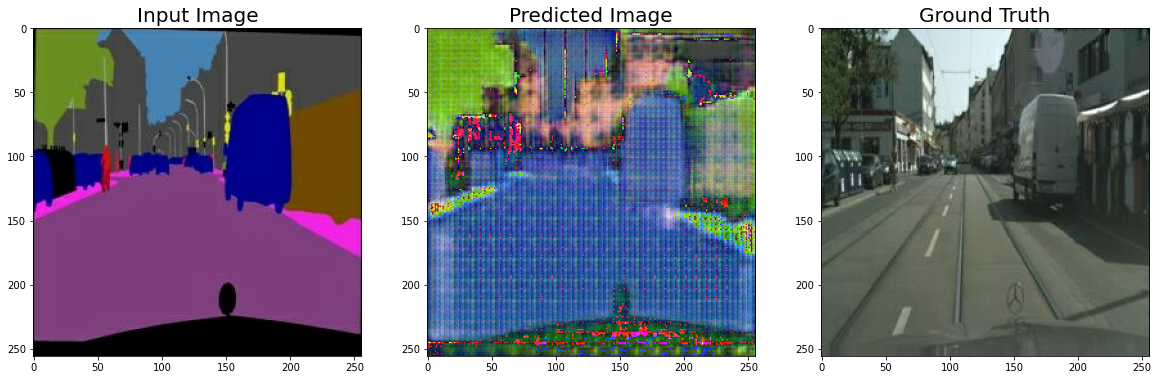

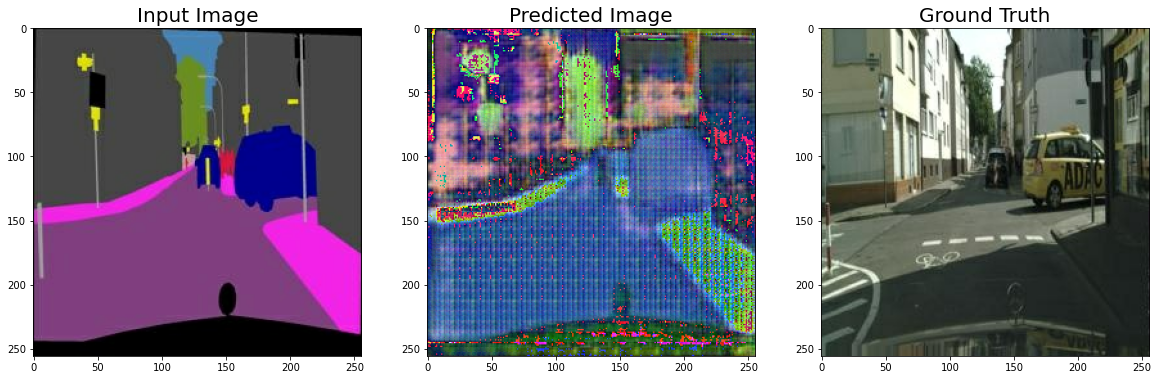

In [24]:
for i in range(5):
    f = val_data_path + os.listdir(val_data_path)[i]
    real_image, input_image = load_img(f)

    pred = generator(tf.expand_dims(input_image, 0))
    pred = denormalize(pred)

    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1); plt.imshow(denormalize(input_image)); plt.title('Input Image', fontsize=20)
    plt.subplot(1,3,2); plt.imshow(pred[0]); plt.title('Predicted Image', fontsize=20)
    plt.subplot(1,3,3); plt.imshow(denormalize(real_image)); plt.title('Ground Truth', fontsize=20)

#### 회고
- Epoch의 수를 늘리면 성능이 더 좋아지겠지만, 시간이 많이 걸릴 것이므로 Epoch를 32로 설정해서 돌려봤다.
- 오히려 이미지의 학습 과정을 볼 수 있어서 나름의 의미가 있었다.
- 입력 이미지를 입력 넣어서 예측한 이미지의 성능이 충분히 좋진 않았지만 위의 그림 중 마지막 그림을 보면 건물 창문의 윤곽선이 드러나기 시작했음을 확인할 수 있다. 또한 색깔이 다양해지고 Input이미지의 윤곽선 내부의 디테일이 보이기 시작했다. Epoch의 수를 늘린다면 충분히 Ground Truth와 비슷한 결과가 나올 것임을 예측할 수 있다. 
- Predicted Image에서 픽셀의 모습을 확인할 수 있는데 여기서 Pix2pix가 픽셀을 기준으로 학습한다는 것을 확인할 수 있었다.
- Predicted Image의 도로 부분이 파란색, 초록색, 빨간색의 혼합인 걸로 보아 색깔을 rgb의 조합으로 재현하는 과정을 볼 수 있었다.